# Predicitions

In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For web scraping
import requests
from bs4 import BeautifulSoup
import seaborn as sns
# For performing regex operations
import re

# For adding delays so that we don't spam requests
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm #used for plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # 1. Import the scaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from numpy import unique

read in both files, take a look at them to make sure they're alright.

In [635]:
nba = pd.read_csv('~/Downloads/nba_clusters.csv')

In [636]:
ncaa = pd.read_csv('~/Downloads/ncca_clusters.csv')

In [637]:
nba

,Player,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,labels
0,A.C. Green,3.37,2.42,5.79,0.12,-0.51,0.42,-0.08,1.28,265.44,...,198.67,364.06,562.72,81.61,61.28,31.22,83.78,143.39,718.22,1
1,A.J. Bramlett,-0.20,0.10,-0.20,-0.13,-10.50,-6.30,-16.80,-0.20,4.00,...,12.00,10.00,22.00,0.00,1.00,0.00,3.00,13.00,8.00,3
2,A.J. English,-0.20,0.70,0.55,0.02,-2.25,-2.85,-5.10,-1.20,308.50,...,70.00,87.50,157.50,160.00,28.50,12.00,101.50,143.50,751.00,2
3,A.J. Guyton,0.10,-0.03,0.10,-0.14,-6.07,-4.93,-11.00,-0.33,55.33,...,7.33,19.33,26.67,49.00,6.67,4.00,20.67,19.33,147.33,3
4,A.J. Hammons,-0.20,0.20,0.00,-0.00,-7.50,1.90,-5.60,-0.10,17.00,...,8.00,28.00,36.00,4.00,1.00,13.00,10.00,21.00,48.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Zelmo Beaty*,1.10,1.20,2.30,0.09,-2.70,0.40,-2.30,-0.10,136.00,...,93.00,234.00,327.00,74.00,45.00,29.00,12.80,130.00,380.00,2
3231,Zendon Hamilton,0.18,0.19,0.40,0.05,-6.01,-2.91,-8.95,-0.16,22.88,...,23.38,36.00,59.38,4.12,5.38,3.50,14.25,27.50,76.38,0
3232,Zoran Dragic,-0.07,0.00,-0.03,-0.05,-1.93,-4.77,-6.70,-0.07,7.33,...,3.33,2.00,5.33,3.33,1.33,0.00,3.33,4.00,18.67,0
3233,Zoran Planinic,-0.20,0.70,0.53,0.05,-3.23,-0.83,-4.13,-0.30,65.67,...,15.67,50.33,66.00,55.00,19.33,2.33,40.00,79.00,187.00,0


In [638]:
ncaa

,Unnamed: 0,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
0,0,Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.728,2.50,1.80,134.0,8.5,2
1,1,Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.662,4.05,2.75,93.5,13.4,3
2,2,"University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.628,7.90,5.00,88.0,26.4,0
3,3,Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.863,6.40,5.50,64.0,29.0,0
4,4,"University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.700,3.90,2.70,107.0,13.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,4247,Gonzaga,6-7,Corey Kispert,SG/SF,NaN,220.0,4.8,0.411,2.0,8.3,0.4840,4.00,0.827,1.80,1.50,135.0,11.5,1
4248,4248,Texas,6-11,Kai Jones,C,NaN,220.0,1.1,0.345,0.4,4.1,0.5530,2.30,0.677,1.80,1.20,53.0,6.2,2
4249,4249,Michigan,6-9,Franz Wagner,SF/PF,NaN,220.0,4.3,0.325,1.4,9.3,0.4650,4.30,0.835,2.40,2.00,55.0,12.0,1
4250,4250,Stanford,6-8,Ziaire Williams,SG/SF,NaN,185.0,4.0,0.291,1.2,10.2,0.3740,3.80,0.796,2.50,2.00,20.0,10.7,1


create empty lists to keep track of metrics to create visuals for

In [904]:
BR = []
DN = []
My = []

Lets start by making predicitons for 2009 and seeing how our model does against them

## 2009

In [905]:
import scipy

create the data set where we just mannually create a new table of all the players in it, so we can make comparisons

In [906]:
pred2 = ncaa[ncaa['name'] == 'Stephen Curry']
pred2 = pred2.append(ncaa[ncaa['name'] == 'Blake Griffin'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Jonny Flynn'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'DeMar DeRozan'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Hasheem Thabeet'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'James Harden'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Tyreke Evans'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Jordan Hill'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Brandon Jennings'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Terrence Williams'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Gerald Henderson'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Tyler Hansbrough'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Earl Clark'])

drop the useless column

In [907]:
pred2.drop(columns='Unnamed: 0',inplace=True)

take only the numeric columns

In [908]:
pred2 = pred2.loc[:,'weight':]
pred2

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
813,190.0,9.7,0.412,4.0,17.9,0.467,8.4,0.876,5.3,4.6,104.0,25.3,0
1434,251.0,0.1,0.300,0.0,11.5,0.618,7.1,0.589,7.7,4.5,68.0,18.8,0
1180,185.0,4.2,0.333,1.4,12.2,0.460,5.6,0.782,5.1,4.0,73.0,16.6,1
919,221.0,1.0,0.167,0.2,10.5,0.523,5.5,0.646,4.2,2.7,35.0,13.9,3
3693,263.0,0.0,0.250,0.0,5.9,0.611,3.6,0.625,5.0,3.1,100.0,10.3,2
1523,220.0,3.9,0.376,1.5,11.9,0.506,6.0,0.755,7.2,5.4,69.0,19.0,0
1114,220.0,3.4,0.274,0.9,13.6,0.455,6.2,0.711,5.2,3.7,37.0,17.1,0
1661,235.0,0.0,0.222,0.0,8.8,0.578,5.1,0.636,3.6,2.3,97.0,12.5,3
4121,220.0,4.4,0.320,1.4,10.3,0.400,4.1,0.589,2.6,1.5,140.0,11.2,1
1612,175.0,3.8,0.366,1.4,13.8,0.481,6.6,0.627,2.8,1.7,103.0,15.0,1


don't include this years crop of players for the table we look for comparisons on

In [909]:
pred = ncaa.loc[:4240,'weight':]
pred

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
0,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.7280,2.50,1.80,134.0,8.5,2
1,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.6620,4.05,2.75,93.5,13.4,3
2,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.6280,7.90,5.00,88.0,26.4,0
3,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.8630,6.40,5.50,64.0,29.0,0
4,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.7000,3.90,2.70,107.0,13.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,195.0,1.1,0.268,0.3,5.2,0.4770,2.50,0.6000,2.60,1.60,127.0,6.9,2
4237,240.0,0.7,0.294,0.2,8.2,0.4770,3.90,0.6240,3.90,2.40,26.0,10.5,2
4238,240.0,0.0,0.250,0.0,2.9,0.4760,1.40,0.4290,1.00,0.40,63.0,3.2,2
4239,170.0,3.8,0.366,1.4,10.7,0.4550,4.90,0.7560,3.80,2.80,109.0,14.0,1


NOTE: for every player listed in each draft for 2009, 2010 and 2011, the code is identical except for changed input fields catered for each player. I won't be commenting on the whole process nor will I comment every line of code as its simply just the same copy and past for each one, as well this also helps reduce redundancies and time.

The format is simply find minimum euclidean distances from each player in the clustered data set, find a appropriate comparison, and then compare it with the other two sources to measure accuracy.

Comparison data was copy and pasted in excel, and then converted into a csv, in the future I hope to use a seline and beautiful soup packages to scrap with the help of a VPN. The data is included in the project zip

### Stephen Curry

create a matrix where we compare the shortest distances for Stephen Curry in the ncaa matrix to find him a comparison before he would have gotten drafted

In [910]:
# calculate distance of point in the cluster
similar1 = scipy.spatial.distance.cdist(pred,pred2[0:1],metric='euclidean')
# calculate the smallest distance(s)
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
813,190.0,9.7,0.412,4.0,17.9,0.467,8.4,0.876,5.3,4.6,104.0,25.3,0


In [911]:
# check his statline
pred2[0:1]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
813,190.0,9.7,0.412,4.0,17.9,0.467,8.4,0.876,5.3,4.6,104.0,25.3,0


sort the values

In [912]:
# grab and sort all the distances for the player to make a comparison
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
813,0.000000
2063,4.609038
1189,8.398715
1493,8.964114
2455,9.955632
4087,10.063925
4180,10.610085
1007,10.882417
2258,11.034084
3183,11.064709


pick an appropriate player, given they haven't been drafted before 1971 and have played enough games in the NBA to make a comparison on.

NOTE: for all players compared I have done the aboves reasoning to find an appropriate comparison the model gives me

In [913]:
# this index left is the player we have chosen as a good comparison the model has given us
ncaa.loc[1493]

Unnamed: 0                         1493
college       University of Connecticut
height                              6-6
name                   Richard Hamilton
position                            G-F
url           /players/h/hamilri01.html
weight                              185
3PA                                 6.1
3P%                               0.378
3P                                  2.3
FGA                                15.7
FG%                               0.426
FG                                  6.7
FT%                               0.826
FTA                                 4.9
FT                                    4
G                                   103
PTS                                19.8
labels                                0
Name: 1493, dtype: object

Lets now compare the results and save them

Order for all players in terms of results is Bleacher Report, Draft Net and my model respectively

In [914]:
# append the results of the distance of bleacher report and its comparison in the NBA cluster
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], nba[nba['Player'] =='Chauncey Billups'].iloc[:,1:], metric='euclidean'))
# print the results          
scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chauncey Billups'].iloc[:,1:], metric='euclidean')

array([[1196.80134496]])

In [915]:
# append the results of the distance of draft net and its comparison in the NBA cluster
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mahmoud Abdul-Rauf'].iloc[:,1:], metric='euclidean'))
scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mahmoud Abdul-Rauf'].iloc[:,1:], metric='euclidean')

array([[1001.17405764]])

In [916]:
# append the r# append the results of the distance of my models and its comparison in the NBA cluster
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Richard Hamilton'].iloc[:,1:], metric='euclidean'))
scipy.spatial.distance.cdist(nba[nba['Player'] =='Stephen Curry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Richard Hamilton'].iloc[:,1:], metric='euclidean')

array([[854.68808562]])

My model scored first.

NOTE: distance calculated is done from the player and their comparison in the NBA clustered data set, the lower the score the more accurate it is compared to the others.

### Blake Griffin

In [917]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[1:2],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1434,251.0,0.1,0.3,0.0,11.5,0.618,7.1,0.589,7.7,4.5,68.0,18.8,0


In [918]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
1434,0.000000
2169,5.335763
3553,5.509866
3646,7.353823
1113,7.947875
1905,8.021410
3965,8.541332
3005,8.888299
2952,9.328170
137,9.908369


In [919]:
ncaa.loc[3965]

Unnamed: 0                         3965
college          University of Michigan
height                              6-9
name                       Chris Webber
position                            F-C
url           /players/w/webbech01.html
weight                              245
3PA                                 1.9
3P%                               0.306
3P                                  0.6
FGA                                12.4
FG%                               0.589
FG                                  7.3
FT%                                0.53
FTA                                 4.2
FT                                  2.2
G                                    70
PTS                                17.4
labels                                3
Name: 3965, dtype: object

In [920]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Karl Malone*'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carlos Boozer'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Webber'].iloc[:,1:], metric='euclidean'))

In [921]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Karl Malone*'].iloc[:,1:], metric='euclidean')

array([[796.15348759]])

In [922]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carlos Boozer'].iloc[:,1:], metric='euclidean')

array([[573.0560203]])

In [923]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Blake Griffin'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Webber'].iloc[:,1:], metric='euclidean')

array([[660.09629994]])

My model came in 2nd

### Jonny Flynn

In [924]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[2:3],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1180,185.0,4.2,0.333,1.4,12.2,0.46,5.6,0.782,5.1,4.0,73.0,16.6,1


In [925]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
1180,0.000000
135,2.122670
669,3.019645
665,4.012438
2164,4.859144
966,4.886657
1813,5.352864
4034,5.481768
2935,5.597451
283,5.891240


In [926]:
ncaa.loc[135]

Unnamed: 0                              135
college       University of Texas at Austin
height                                  6-0
name                          D.J. Augustin
position                                  G
url               /players/a/augusdj01.html
weight                                  183
3PA                                     4.1
3P%                                   0.402
3P                                      1.6
FGA                                    12.2
FG%                                   0.443
FG                                      5.4
FT%                                   0.808
FTA                                     5.5
FT                                      4.4
G                                        73
PTS                                    16.9
labels                                    1
Name: 135, dtype: object

In [927]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tony Delk'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='Damon Stoudamire'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='Damon Stoudamire'].iloc[:,1:], metric='euclidean'))

In [928]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tony Delk'].iloc[:,1:], metric='euclidean')

array([[164.75956695]])

In [929]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='Damon Stoudamire'].iloc[:,1:], metric='euclidean')

array([[775.77623475]])

In [930]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jonny Flynn'].iloc[:,1:], 
                                 nba[nba['Player'] =='D.J. Augustin'].iloc[:,1:], metric='euclidean')

array([[339.01109554]])

my model came in 2nd

### DeMar DeRozan

In [931]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[3:4],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
919,221.0,1.0,0.167,0.2,10.5,0.523,5.5,0.646,4.2,2.7,35.0,13.9,3


In [932]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
919,0.000000
2201,3.333066
2289,3.469108
1352,3.683298
1950,4.056926
912,4.189696
661,4.288617
3891,4.506104
1627,4.971518
713,5.581017


In [933]:
ncaa.loc[912]

Unnamed: 0                         912
college                Duke University
height                             6-9
name                         Luol Deng
position                             F
url           /players/d/denglu01.html
weight                             220
3PA                                  3
3P%                               0.36
3P                                 1.1
FGA                               11.9
FG%                              0.476
FG                                 5.7
FT%                               0.71
FTA                                3.7
FT                                 2.6
G                                   37
PTS                               15.1
labels                               1
Name: 912, dtype: object

In [934]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jason Richardson'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vince Carter'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luol Deng'].iloc[:,1:], metric='euclidean'))

In [935]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jason Richardson'].iloc[:,1:], metric='euclidean')

array([[860.16843112]])

In [936]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vince Carter'].iloc[:,1:], metric='euclidean')

array([[542.50730502]])

In [937]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMar DeRozan'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luol Deng'].iloc[:,1:], metric='euclidean')

array([[813.32016285]])

my model came in 2nd

### Hasheem Thabeet

In [938]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[4:5],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3693,263.0,0.0,0.25,0.0,5.9,0.611,3.6,0.625,5.0,3.1,100.0,10.3,2


In [939]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
3693,0.000000
3680,3.688516
331,3.688516
2648,4.313369
3997,4.313369
3625,4.677785
38,5.339636
1491,6.259332
366,6.288871
3677,7.233067


In [940]:
ncaa.loc[2648]

Unnamed: 0                                                 2648
college       Salem International University, West Virginia ...
height                                                      7-0
name                                                  Ron Moore
position                                                      C
url                                   /players/m/moorero01.html
weight                                                      260
3PA                                                           0
3P%                                                        0.25
3P                                                            0
FGA                                                         7.4
FG%                                                       0.543
FG                                                          4.1
FT%                                                       0.648
FTA                                                         3.5
FT                                      

In [941]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Samuel Dalembert'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dikembe Mutombo*'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Ron Moore'].iloc[:,1:], metric='euclidean'))

In [942]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Samuel Dalembert'].iloc[:,1:], metric='euclidean')

array([[968.81559618]])

In [943]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dikembe Mutombo*'].iloc[:,1:], metric='euclidean')

array([[1172.20132341]])

In [944]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Hasheem Thabeet'].iloc[:,1:], 
                                 nba[nba['Player'] =='Ron Moore'].iloc[:,1:], metric='euclidean')

array([[126.98572794]])

My model came in 1st by a large margin

### James Harden

In [945]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[5:6],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1523,220.0,3.9,0.376,1.5,11.9,0.506,6.0,0.755,7.2,5.4,69.0,19.0,0


In [946]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
1523,0.000000
3572,4.986157
462,5.036101
150,5.310163
3477,5.701335
147,5.759492
3873,5.915411
1963,6.382311
514,6.428568
280,7.017812


In [947]:
ncaa.loc[3873]

Unnamed: 0                        3873
college           Marquette University
height                             6-4
name                       Dwyane Wade
position                             G
url           /players/w/wadedw01.html
weight                             220
3PA                                1.5
3P%                              0.333
3P                                 0.5
FGA                               14.8
FG%                              0.494
FG                                 7.3
FT%                              0.745
FTA                                6.2
FT                                 4.6
G                                   65
PTS                               19.7
labels                               0
Name: 3873, dtype: object

In [948]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Manu Ginobili'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dwyane Wade'].iloc[:,1:], metric='euclidean'))

In [949]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean')

array([[1011.56728298]])

In [950]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Manu Ginobili'].iloc[:,1:], metric='euclidean')

array([[1172.4187722]])

In [951]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='James Harden'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dwyane Wade'].iloc[:,1:], metric='euclidean')

array([[654.60266857]])

My model came in first by a large margin

### Tyreke Evans

In [952]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[6:7],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1114,220.0,3.4,0.274,0.9,13.6,0.455,6.2,0.711,5.2,3.7,37.0,17.1,0


In [953]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1114,0.000000
3891,2.681488
912,3.436253
2831,5.080791
2201,5.961890
2684,5.964122
661,6.091334
1627,6.397338
1950,6.516282
919,6.527656


In [954]:
ncaa.loc[1627]

Unnamed: 0                         1627
college            University of Kansas
height                              6-6
name                       Xavier Henry
position                              G
url           /players/h/henryxa01.html
weight                              220
3PA                                 4.6
3P%                               0.418
3P                                  1.9
FGA                                 9.8
FG%                               0.458
FG                                  4.5
FT%                               0.783
FTA                                 3.2
FT                                  2.5
G                                    36
PTS                                13.4
labels                                1
Name: 1627, dtype: object

In [955]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kendall Gill'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jamal Crawford'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Lamar Odom'].iloc[:,1:], metric='euclidean'))

In [956]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kendall Gill'].iloc[:,1:], metric='euclidean')

array([[141.4961215]])

In [957]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jamal Crawford'].iloc[:,1:], metric='euclidean')

array([[382.1611223]])

In [958]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyreke Evans'].iloc[:,1:], 
                                 nba[nba['Player'] =='Lamar Odom'].iloc[:,1:], metric='euclidean')

array([[464.54418369]])

My model came in last but wasn't to far away from the rest

### Jordan Hill

In [959]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[7:8],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1661,235.0,0.0,0.222,0.0,8.8,0.578,5.1,0.636,3.6,2.3,97.0,12.5,3


In [960]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
1661,0.000000
904,1.119181
3016,1.964097
373,2.071940
2195,3.078513
832,3.344855
174,3.344855
1867,3.491139
1206,3.491139
863,3.780110


In [961]:
ncaa.loc[373]

Unnamed: 0                          373
college          University of Kentucky
height                              7-1
name                          Sam Bowie
position                            C-F
url           /players/b/bowiesa01.html
weight                              235
3PA                                 0.1
3P%                               0.222
3P                                    0
FGA                                 9.6
FG%                               0.522
FG                                    5
FT%                               0.735
FTA                                 4.5
FT                                  3.3
G                                    96
PTS                                13.4
labels                                3
Name: 373, dtype: object

In [962]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Joe Smith'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Bosh'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Sam Bowie'].iloc[:,1:], metric='euclidean'))

In [963]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Joe Smith'].iloc[:,1:], metric='euclidean')

array([[422.33381193]])

In [964]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Bosh'].iloc[:,1:], metric='euclidean')

array([[1626.01706978]])

In [965]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Jordan Hill'].iloc[:,1:], 
                                 nba[nba['Player'] =='Sam Bowie'].iloc[:,1:], metric='euclidean')

array([[487.23359151]])

My model came in 2nd but very close to 1st

### Terrence Williams

In [966]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[8:9],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
4121,220.0,4.4,0.32,1.4,10.3,0.4,4.1,0.589,2.6,1.5,140.0,11.2,1


In [967]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:10]

,0
4121,0.000000
1369,3.464475
2972,4.469335
4222,4.908310
2665,5.180331
1551,5.457773
2318,5.605228
1595,6.141993
1896,6.183754
3034,6.250472


In [968]:
ncaa.loc[4222]

Unnamed: 0                         4222
college        University of Pittsburgh
height                              6-6
name                          Sam Young
position                              F
url           /players/y/youngsa01.html
weight                              220
3PA                                 2.3
3P%                               0.356
3P                                  0.8
FGA                                10.1
FG%                               0.498
FG                                    5
FT%                               0.692
FTA                                 3.4
FT                                  2.4
G                                   143
PTS                                13.2
labels                                3
Name: 4222, dtype: object

In [969]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Josh Howard'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Isaiah Rider'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Sam Young'].iloc[:,1:], metric='euclidean'))

In [970]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Josh Howard'].iloc[:,1:], metric='euclidean')

array([[768.04136412]])

In [971]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Isaiah Rider'].iloc[:,1:], metric='euclidean')

array([[1388.34912072]])

In [972]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Terrence Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Sam Young'].iloc[:,1:], metric='euclidean')

array([[139.24771345]])

My model placed fist by a large margin

### Gerald Henderson

In [973]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[10:11],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1613,215.0,2.0,0.329,0.7,9.7,0.458,4.4,0.706,3.9,2.7,103.0,12.3,3


In [974]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1613,0.000000
2584,1.469308
3264,2.469134
3497,3.219011
1209,3.271688
794,3.370761
542,3.375424
3365,3.910031
1732,3.910031
405,3.910031


In [975]:
ncaa.loc[3264]

Unnamed: 0                        3264
college       University of Washington
height                             6-6
name                       Brandon Roy
position                             G
url            /players/r/roybr01.html
weight                             215
3PA                                1.5
3P%                              0.344
3P                                 0.5
FGA                               10.1
FG%                              0.512
FG                                 5.2
FT%                              0.765
FTA                                4.5
FT                                 3.5
G                                  103
PTS                               14.3
labels                               3
Name: 3264, dtype: object

In [976]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='John Salmons'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Latrell Sprewell'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Norm Nixon'].iloc[:,1:], metric='euclidean'))

In [977]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='John Salmons'].iloc[:,1:], metric='euclidean')

array([[161.87003707]])

In [978]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Latrell Sprewell'].iloc[:,1:], metric='euclidean')

array([[1226.24188723]])

In [979]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gerald Henderson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Norm Nixon'].iloc[:,1:], metric='euclidean')

array([[1333.38194581]])

My model came last, didn't perform well here

### Tyler Hansbrough

In [980]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[11:12],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1512,250.0,0.3,0.316,0.1,12.3,0.536,6.6,0.791,8.7,6.9,142.0,20.2,0


In [981]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:20]

,0
1512,0.000000
4119,9.578152
703,10.373544
2286,10.910313
1965,11.900200
1116,12.900784
837,12.946629
3491,13.241538
1592,13.829099
225,14.413793


In [982]:
ncaa.loc[4119]

Unnamed: 0                         4119
college                 Duke University
height                              6-9
name                   Shelden Williams
position                              F
url           /players/w/willish02.html
weight                              250
3PA                                 0.1
3P%                               0.333
3P                                    0
FGA                                 8.6
FG%                               0.572
FG                                  4.9
FT%                               0.694
FTA                                 5.7
FT                                    4
G                                   139
PTS                                13.9
labels                                3
Name: 4119, dtype: object

In [983]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tyrone Hill'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eduardo Najera'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Shelden Williams'].iloc[:,1:], metric='euclidean'))

In [984]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tyrone Hill'].iloc[:,1:], metric='euclidean')

array([[233.44565492]])

In [985]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eduardo Najera'].iloc[:,1:], metric='euclidean')

array([[346.25489556]])

In [986]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tyler Hansbrough'].iloc[:,1:], 
                                 nba[nba['Player'] =='Shelden Williams'].iloc[:,1:], metric='euclidean')

array([[367.07373169]])

My model came in last but was very close to the others in predicitions so not as bad as it sounds to be last

### Earl Clark

In [987]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[12:13],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
659,225.0,1.8,0.298,0.5,8.6,0.467,4.0,0.64,3.2,2.0,104.0,10.6,2


In [988]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
659,0.000000
1476,3.014655
979,3.014655
35,3.014655
382,3.014655
3967,3.014655
3970,3.014655
1515,3.014655
3566,3.014655
2921,3.014655


In [989]:
ncaa.loc[703]

Unnamed: 0                          703
college            University of Kansas
height                             6-10
name                      Nick Collison
position                              F
url           /players/c/collini01.html
weight                              255
3PA                                 0.5
3P%                               0.359
3P                                  0.2
FGA                                10.7
FG%                               0.562
FG                                    6
FT%                               0.624
FTA                                   4
FT                                  2.5
G                                   142
PTS                                14.8
labels                                3
Name: 703, dtype: object

In [990]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vladimir Radmanovic'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Downing'].iloc[:,1:], metric='euclidean'))

In [991]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vladimir Radmanovic'].iloc[:,1:], metric='euclidean')

array([[415.82505889]])

In [992]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean')

array([[985.38351716]])

In [993]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Earl Clark'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Downing'].iloc[:,1:], metric='euclidean')

array([[232.63378645]])

My model placed first

---

# 2010

In [994]:
pred2 = ncaa[ncaa['name'] == 'John Wall']
pred2 = pred2.append(ncaa[ncaa['name'] == 'Evan Turner'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Derrick Favors'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Wesley Johnson'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Hasheem Thabeet'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'DeMarcus Cousins'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Ekpe Udoh'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Greg Monroe'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Al-Farouq Aminu'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Gord0n Hayward'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Paul George'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Cole Aldrich'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Xavier Henry'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Ed Davis'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Patrick Patterson'])

In [995]:
pred2

,Unnamed: 0,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3899,3899,University of Kentucky,6-4,John Wall,G,/players/w/walljo01.html,195.0,3.1,0.325,1.0,11.8,0.461,5.5,0.754,6.3,4.7,37.0,16.6,0
3804,3804,Ohio State University,6-7,Evan Turner,G,/players/t/turneev01.html,220.0,1.5,0.362,0.5,10.6,0.502,5.3,0.758,5.0,3.8,101.0,15.0,3
1131,1131,Georgia Institute of Technology,6-10,Derrick Favors,F-C,/players/f/favorde01.html,265.0,0.0,0.000,0.0,8.1,0.611,5.0,0.629,4.0,2.5,36.0,12.4,2
1927,1927,"Iowa State University, Syracuse University",6-7,Wesley Johnson,F-G,/players/j/johnswe01.html,215.0,4.0,0.349,1.4,10.9,0.454,5.0,0.768,3.3,2.6,93.0,13.9,1
3693,3693,University of Connecticut,7-3,Hasheem Thabeet,C,/players/t/thabeha01.html,263.0,0.0,0.250,0.0,5.9,0.611,3.6,0.625,5.0,3.1,100.0,10.3,2
760,760,University of Kentucky,6-11,DeMarcus Cousins,C-F,/players/c/couside01.html,270.0,0.2,0.167,0.0,9.7,0.558,5.4,0.604,7.1,4.3,38.0,15.1,3
3820,3820,"University of Michigan, Baylor University",6-10,Ekpe Udoh,C-F,/players/u/udohek01.html,240.0,0.4,0.289,0.1,7.0,0.472,3.3,0.649,2.5,1.6,103.0,8.4,2
2632,2632,Georgetown University,6-11,Greg Monroe,C-F,/players/m/monrogr01.html,265.0,0.5,0.273,0.1,9.8,0.543,5.3,0.677,5.5,3.7,65.0,14.5,3
66,66,Wake Forest University,6-9,Al-Farouq Aminu,F,/players/a/aminual01.html,220.0,1.7,0.238,0.4,10.6,0.476,5.0,0.687,5.7,3.9,62.0,14.4,3
1305,1305,"California State University, Fresno",6-9,Paul George,F,/players/g/georgpa01.html,220.0,4.9,0.396,1.9,11.4,0.447,5.1,0.803,4.2,3.4,63.0,15.5,1


In [996]:
pred2.drop(columns='Unnamed: 0',inplace=True)

In [997]:
pred2 = pred2.loc[:,'weight':]
pred2

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3899,195.0,3.1,0.325,1.0,11.8,0.461,5.5,0.754,6.3,4.7,37.0,16.6,0
3804,220.0,1.5,0.362,0.5,10.6,0.502,5.3,0.758,5.0,3.8,101.0,15.0,3
1131,265.0,0.0,0.000,0.0,8.1,0.611,5.0,0.629,4.0,2.5,36.0,12.4,2
1927,215.0,4.0,0.349,1.4,10.9,0.454,5.0,0.768,3.3,2.6,93.0,13.9,1
3693,263.0,0.0,0.250,0.0,5.9,0.611,3.6,0.625,5.0,3.1,100.0,10.3,2
760,270.0,0.2,0.167,0.0,9.7,0.558,5.4,0.604,7.1,4.3,38.0,15.1,3
3820,240.0,0.4,0.289,0.1,7.0,0.472,3.3,0.649,2.5,1.6,103.0,8.4,2
2632,265.0,0.5,0.273,0.1,9.8,0.543,5.3,0.677,5.5,3.7,65.0,14.5,3
66,220.0,1.7,0.238,0.4,10.6,0.476,5.0,0.687,5.7,3.9,62.0,14.4,3
1305,220.0,4.9,0.396,1.9,11.4,0.447,5.1,0.803,4.2,3.4,63.0,15.5,1


## John Wall

In [998]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[0:1],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3899,195.0,3.1,0.325,1.0,11.8,0.461,5.5,0.754,6.3,4.7,37.0,16.6,0


In [999]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
3899,0.000000
1220,3.713369
2514,3.885053
4033,4.557507
239,4.736816
3493,5.710754
1098,5.745729
4005,6.254649
3287,6.402152
3174,6.438292


In [1000]:
ncaa.loc[1220]

Unnamed: 0                         1220
college          University of Maryland
height                              6-3
name                      Steve Francis
position                              G
url           /players/f/francst01.html
weight                              195
3PA                                 3.4
3P%                               0.388
3P                                  1.3
FGA                                11.5
FG%                               0.523
FG                                    6
FT%                                0.79
FTA                                 4.6
FT                                  3.6
G                                    34
PTS                                  17
labels                                0
Name: 1220, dtype: object

In [1001]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Francis'].iloc[:,1:], metric='euclidean'))

In [1002]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean')

array([[495.3532373]])

In [1003]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean')

array([[495.3532373]])

In [1004]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='John Wall'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Francis'].iloc[:,1:], metric='euclidean')

array([[640.88619278]])

My model came in last but wasn't way off in its predicition

## Evan Turner

In [1005]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[1:2],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3804,220.0,1.5,0.362,0.5,10.6,0.502,5.3,0.758,5.0,3.8,101.0,15.0,3


In [1006]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:25]

,0
3804,0.00000
2757,2.88666
3321,2.88666
3018,2.88666
3338,2.88666
2412,2.88666
2669,2.88666
4199,2.88666
500,2.88666
3926,2.88666


In [1007]:
ncaa.loc[1638]

Unnamed: 0                         1638
college                Davidson College
height                              6-8
name                        Fred Hetzel
position                            F-C
url           /players/h/hetzefr01.html
weight                              220
3PA                                 0.1
3P%                               0.288
3P                                    0
FGA                                 9.6
FG%                               0.535
FG                                  5.2
FT%                               0.679
FTA                                 4.2
FT                                  2.7
G                                   100
PTS                                13.5
labels                                3
Name: 1638, dtype: object

In [1008]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Fred Hetzel'].iloc[:,1:], metric='euclidean'))

In [1009]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean')

array([[400.7931968]])

In [1010]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean')

array([[400.7931968]])

In [1011]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Evan Turner'].iloc[:,1:], 
                                 nba[nba['Player'] =='Fred Hetzel'].iloc[:,1:], metric='euclidean')

array([[858.78525139]])

my model placed last and did poorly for this prediction

## Derrick Favours

In [1012]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[2:3],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1131,265.0,0.0,0.0,0.0,8.1,0.611,5.0,0.629,4.0,2.5,36.0,12.4,2


In [1013]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1131,0.000000
4023,3.212359
2123,5.123964
1988,5.861689
4016,6.149307
3089,6.184708
760,7.275392
3611,10.120364
2687,11.486324
2838,12.024402


In [1014]:
ncaa.loc[3089]

Unnamed: 0                         3089
college       Michigan State University
height                              6-9
name                      Zach Randolph
position                            F-C
url           /players/r/randoza01.html
weight                              260
3PA                                   0
3P%                                   0
3P                                    0
FGA                                 7.1
FG%                               0.587
FG                                  4.2
FT%                               0.635
FTA                                 3.8
FT                                  2.4
G                                    33
PTS                                10.8
labels                                2
Name: 3089, dtype: object

In [1015]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Jefferson'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Zach Randolph'].iloc[:,1:], metric='euclidean'))

In [1016]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Jefferson'].iloc[:,1:], metric='euclidean')

array([[792.12378875]])

In [1017]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean')

array([[473.10292347]])

In [1018]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Favors'].iloc[:,1:], 
                                 nba[nba['Player'] =='Zach Randolph'].iloc[:,1:], metric='euclidean')

array([[681.26986525]])

My model placed 2nd, it performed ok for this player

## Wesley Johnson

In [1019]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[3:4],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1927,215.0,4.0,0.349,1.4,10.9,0.454,5.0,0.768,3.3,2.6,93.0,13.9,1


In [1020]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1927,0.000000
503,3.636813
3316,4.400710
3771,4.873729
835,4.873729
1739,4.873729
1432,4.873729
2082,4.873729
3115,4.873729
922,4.873729


In [1021]:
ncaa.loc[2790]

Unnamed: 0                                          2790
college       University of Illinois at Urbana-Champaign
height                                               6-8
name                                          Ken Norman
position                                               F
url                            /players/n/normake01.html
weight                                               215
3PA                                                  0.1
3P%                                                 0.25
3P                                                     0
FGA                                                   10
FG%                                                0.609
FG                                                   6.1
FT%                                                0.736
FTA                                                  4.1
FT                                                     3
G                                                     92
PTS                            

In [1022]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vince Carter'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddie Johnson'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Ken Norman'].iloc[:,1:], metric='euclidean'))

In [1023]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Vince Carter'].iloc[:,1:], metric='euclidean')

array([[1039.95277085]])

In [1024]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddie Johnson'].iloc[:,1:], metric='euclidean')

array([[822.2043299]])

In [1025]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Wesley Johnson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Ken Norman'].iloc[:,1:], metric='euclidean')

array([[724.92073767]])

My model placed 1st but not by much

## DeMarcus Cousins

In [1026]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[4:5],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3693,263.0,0.0,0.25,0.0,5.9,0.611,3.6,0.625,5.0,3.1,100.0,10.3,2


In [1027]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
3693,0.000000
3680,3.688516
331,3.688516
2648,4.313369
3997,4.313369
3625,4.677785
38,5.339636
1491,6.259332
366,6.288871
3677,7.233067


In [1028]:
ncaa.loc[356]

Unnamed: 0                          356
college                 Duke University
height                              6-9
name                      Carlos Boozer
position                            F-C
url           /players/b/boozeca01.html
weight                              258
3PA                                   0
3P%                                   0
3P                                    0
FGA                                 8.7
FG%                               0.631
FG                                  5.5
FT%                               0.741
FTA                                 5.3
FT                                  3.9
G                                   101
PTS                                14.9
labels                                3
Name: 356, dtype: object

In [1029]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kendrick Perkins'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddy Curry'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carlos Boozer'].iloc[:,1:], metric='euclidean'))

In [1030]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kendrick Perkins'].iloc[:,1:], metric='euclidean')

array([[1798.73622705]])

In [1031]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddy Curry'].iloc[:,1:], metric='euclidean')

array([[1337.40340436]])

In [1032]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='DeMarcus Cousins'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carlos Boozer'].iloc[:,1:], metric='euclidean')

array([[496.24476199]])

My model placed 1st and did a great job in prediciting this player

## Ekpe Udoh

In [1033]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[5:6],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
760,270.0,0.2,0.167,0.0,9.7,0.558,5.4,0.604,7.1,4.3,38.0,15.1,3


In [1034]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
760,0.000000
4016,4.688216
2838,6.508694
4023,7.022742
1131,7.275392
2123,7.715011
1988,11.555876
2687,11.652738
993,12.589431
3089,12.932892


In [1035]:
ncaa.loc[2123]

Unnamed: 0                         2123
college           Ohio State University
height                              7-0
name                       Kosta Koufos
position                              C
url           /players/k/koufoko01.html
weight                              265
3PA                                 1.7
3P%                               0.349
3P                                  0.6
FGA                                11.8
FG%                               0.508
FG                                    6
FT%                                0.68
FTA                                 2.7
FT                                  1.8
G                                    37
PTS                                14.4
labels                                3
Name: 2123, dtype: object

In [1036]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dikembe Mutombo*'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jerome Moiso'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kosta Koufos'].iloc[:,1:], metric='euclidean'))

In [1037]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Dikembe Mutombo*'].iloc[:,1:], metric='euclidean')

array([[919.23499417]])

In [1038]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jerome Moiso'].iloc[:,1:], metric='euclidean')

array([[311.61778512]])

In [1039]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ekpe Udoh'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kosta Koufos'].iloc[:,1:], metric='euclidean')

array([[230.8945675]])

My model placed 1st and did fairly well compared to the other results

## Greg Monre

In [1040]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[6:7],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3820,240.0,0.4,0.289,0.1,7.0,0.472,3.3,0.649,2.5,1.6,103.0,8.4,2


In [1041]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
3820,0.000000
936,1.745665
422,2.203638
614,2.540575
1894,2.783265
916,2.783265
1160,2.783265
551,2.783265
505,2.783265
934,2.783265


In [1042]:
ncaa.loc[422]

Unnamed: 0                              422
college       Pennsylvania State University
height                                  6-9
name                       Frank Brickowski
position                                F-C
url               /players/b/brickfr01.html
weight                                  240
3PA                                     0.1
3P%                                   0.288
3P                                        0
FGA                                     6.2
FG%                                   0.538
FG                                      3.3
FT%                                   0.757
FTA                                     2.5
FT                                      1.9
G                                       101
PTS                                     8.5
labels                                    2
Name: 422, dtype: object

In [1043]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Webber'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Lamar Odom'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Frank Brickowski'].iloc[:,1:], metric='euclidean'))

In [1044]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Webber'].iloc[:,1:], metric='euclidean')

array([[279.93692004]])

In [1045]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Lamar Odom'].iloc[:,1:], metric='euclidean')

array([[431.73190292]])

In [1046]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Greg Monroe'].iloc[:,1:], 
                                 nba[nba['Player'] =='Frank Brickowski'].iloc[:,1:], metric='euclidean')

array([[1070.74495474]])

My model was to off and placed last for comparing this player

## Al-Farouq Aminu

In [1047]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[7:8],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2632,265.0,0.5,0.273,0.1,9.8,0.543,5.3,0.677,5.5,3.7,65.0,14.5,3


In [1048]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
2632,0.000000
833,5.136383
4091,5.343009
3659,6.300559
334,6.497796
2974,6.881402
3304,7.252221
4186,7.928056
312,8.808792
3563,9.092527


In [1049]:
ncaa.loc[137]

Unnamed: 0                          137
college        Arizona State University
height                             6-10
name                       Isaac Austin
position                              C
url           /players/a/austiis01.html
weight                              255
3PA                                   0
3P%                                   0
3P                                    0
FGA                                10.3
FG%                               0.559
FG                                  5.8
FT%                               0.637
FTA                                 5.4
FT                                  3.4
G                                    61
PTS                                  15
labels                                3
Name: 137, dtype: object

In [1050]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='DeJuan Blair'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='Isaac Austin'].iloc[:,1:], metric='euclidean'))

In [1051]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='DeJuan Blair'].iloc[:,1:], metric='euclidean')

array([[300.09982606]])

In [1052]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean')

array([[322.1324102]])

In [1053]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Al-Farouq Aminu'].iloc[:,1:], 
                                 nba[nba['Player'] =='Isaac Austin'].iloc[:,1:], metric='euclidean')

array([[348.05375203]])

My model placed last BUT it was very close to 2nd so by this standard it is a good comparison

## Gordon Hayward

In [1054]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[8:9],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
66,220.0,1.7,0.238,0.4,10.6,0.476,5.0,0.687,5.7,3.9,62.0,14.4,3


In [1055]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
66,0.000000
3871,3.022130
2329,3.066455
3068,4.026699
1305,4.678596
2479,4.945072
4075,5.068831
2590,5.161633
3458,5.294923
3477,5.837920


In [1056]:
ncaa.loc[2590]

Unnamed: 0                         2590
college           University of Florida
height                              6-8
name                        Mike Miller
position                            F-G
url           /players/m/millemi01.html
weight                              218
3PA                                 3.5
3P%                               0.345
3P                                  1.2
FGA                                 9.2
FG%                               0.483
FG                                  4.5
FT%                               0.718
FTA                                 4.4
FT                                  3.1
G                                    65
PTS                                13.3
labels                                1
Name: 2590, dtype: object

In [1057]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Stephen Jackson'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luke Jackson'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Miller'].iloc[:,1:], metric='euclidean'))

In [1058]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Stephen Jackson'].iloc[:,1:], metric='euclidean')

array([[496.81513151]])

In [1059]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luke Jackson'].iloc[:,1:], metric='euclidean')

array([[1520.22319539]])

In [1060]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Gordon Hayward'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Miller'].iloc[:,1:], metric='euclidean')

array([[826.04971588]])

My model placed 2nd out beating draft net by a huge margin but being trumped by bleacher report

## Paul George

In [1061]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[9:10],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1305,220.0,4.9,0.396,1.9,11.4,0.447,5.1,0.803,4.2,3.4,63.0,15.5,1


In [1062]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1305,0.000000
1963,3.768917
3477,4.227773
2329,4.256035
2590,4.542149
66,4.678596
3154,5.023585
4075,5.989085
460,6.023336
3871,6.278436


In [1063]:
ncaa.loc[1908]

Unnamed: 0                         1908
college       Michigan State University
height                              6-9
name                      Magic Johnson
position                            G-F
url           /players/j/johnsma02.html
weight                              215
3PA                                 3.1
3P%                               0.355
3P                                  1.2
FGA                                12.1
FG%                               0.463
FG                                  5.6
FT%                               0.816
FTA                                 7.2
FT                                  5.9
G                                    62
PTS                                17.1
labels                                0
Name: 1908, dtype: object

In [1064]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kevin Durant'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Scottie Pippen*'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Magic Johnson*'].iloc[:,1:], metric='euclidean'))

In [1065]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Kevin Durant'].iloc[:,1:], metric='euclidean')

array([[1105.85496884]])

In [1066]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Scottie Pippen*'].iloc[:,1:], metric='euclidean')

array([[343.96803136]])

In [1067]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Paul George'].iloc[:,1:], 
                                 nba[nba['Player'] =='Magic Johnson*'].iloc[:,1:], metric='euclidean')

array([[805.040029]])

My model placed 2nd but was a large margin away from draft net who placed 1st

## Cole Aldrich

In [1068]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[10:11],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
36,250.0,0.0,0.25,0.0,6.1,0.574,3.5,0.729,3.2,2.3,111.0,9.4,2


In [1069]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
36,0.000000
3340,2.050255
2827,2.357298
3536,3.112217
3366,3.192453
4028,3.218902
2089,3.579876
1568,3.871910
3984,4.213628
2994,5.253394


In [1070]:
ncaa.loc[3340]

Unnamed: 0                         3340
college               Purdue University
height                              6-9
name                    Steve Scheffler
position                            C-F
url           /players/s/schefst01.html
weight                              250
3PA                                   0
3P%                               0.222
3P                                    0
FGA                                 5.4
FG%                               0.685
FG                                  3.7
FT%                                0.75
FTA                                 4.1
FT                                  3.1
G                                   110
PTS                                10.5
labels                                2
Name: 3340, dtype: object

In [1071]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Emeka Okafor'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Joel Przybilla'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Scheffler'].iloc[:,1:], metric='euclidean'))

In [1072]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Emeka Okafor'].iloc[:,1:], metric='euclidean')

array([[1307.37712964]])

In [1073]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Joel Przybilla'].iloc[:,1:], metric='euclidean')

array([[151.4934025]])

In [1074]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Cole Aldrich'].iloc[:,1:], 
                                 nba[nba['Player'] =='Steve Scheffler'].iloc[:,1:], metric='euclidean')

array([[217.67477139]])

My model placed 2nd to draft nets 1st but the margin is small to the point that both compairsons are accurate

## Xavier Henry

In [1075]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[11:12],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1627,220.0,4.6,0.418,1.9,9.8,0.458,4.5,0.783,3.2,2.5,36.0,13.4,1


In [1076]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1627,0.000000
912,3.634421
3891,4.087888
2289,4.503865
919,4.971518
1352,5.077946
4118,5.199328
1950,5.651253
2201,5.772209
4223,6.100984


In [1077]:
ncaa.loc[912]

Unnamed: 0                         912
college                Duke University
height                             6-9
name                         Luol Deng
position                             F
url           /players/d/denglu01.html
weight                             220
3PA                                  3
3P%                               0.36
3P                                 1.1
FGA                               11.9
FG%                              0.476
FG                                 5.7
FT%                               0.71
FTA                                3.7
FT                                 2.6
G                                   37
PTS                               15.1
labels                               1
Name: 912, dtype: object

In [1078]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='James Posey'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jim Jackson'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luol Deng'].iloc[:,1:], metric='euclidean'))

In [1079]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='James Posey'].iloc[:,1:], metric='euclidean')

array([[679.63757673]])

In [1080]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jim Jackson'].iloc[:,1:], metric='euclidean')

array([[821.1809985]])

In [1081]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Xavier Henry'].iloc[:,1:], 
                                 nba[nba['Player'] =='Luol Deng'].iloc[:,1:], metric='euclidean')

array([[1248.07476002]])

My model did a poor job here placing last, this player was incorreclty compared

## Ed Davis

In [1082]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[12:13],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
855,240.0,0.0,0.333,0.0,6.3,0.548,3.4,0.623,3.7,2.3,61.0,9.2,2


In [1083]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
855,0.000000
1245,2.508239
1129,5.097317
357,5.207359
1150,5.693823
3439,5.836867
2735,6.545112
1267,6.840776
2232,6.861057
2624,7.040890


In [1084]:
ncaa.loc[357]

Unnamed: 0                          357
college             Stanford University
height                              7-0
name                   Curtis Borchardt
position                              C
url           /players/b/borchcu01.html
weight                              240
3PA                                 0.6
3P%                               0.375
3P                                  0.2
FGA                                 6.6
FG%                               0.534
FG                                  3.5
FT%                               0.691
FTA                                 4.2
FT                                  2.9
G                                    66
PTS                                10.2
labels                                2
Name: 357, dtype: object

In [1085]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='P.J. Brown'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='Curtis Borchardt'].iloc[:,1:], metric='euclidean'))

In [1086]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean')

array([[845.94178955]])

In [1087]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='P.J. Brown'].iloc[:,1:], metric='euclidean')

array([[481.96918978]])

In [1088]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Ed Davis'].iloc[:,1:], 
                                 nba[nba['Player'] =='Curtis Borchardt'].iloc[:,1:], metric='euclidean')

array([[572.19118536]])

My model placed 2nd to draft net but the margin is small enough to warrant my model to be deemed correct for this comparison

## Patrick Patterson

In [1089]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[13:14],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2919,230.0,0.8,0.329,0.2,10.9,0.585,6.4,0.734,4.3,3.2,97.0,16.1,3


In [1090]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
2919,0.000000
386,3.283448
2515,4.437027
2034,4.437027
1752,4.437027
1327,4.437027
2573,4.437027
2996,4.437027
4026,4.437027
3774,4.832773


In [1091]:
ncaa.loc[2515]

Unnamed: 0                         2515
college                Drake University
height                              6-7
name                     McCoy McLemore
position                            F-C
url           /players/m/mclemmc01.html
weight                              230
3PA                                 0.1
3P%                               0.288
3P                                    0
FGA                                 9.6
FG%                               0.535
FG                                  5.2
FT%                               0.679
FTA                                 4.2
FT                                  2.7
G                                   100
PTS                                13.5
labels                                3
Name: 2515, dtype: object

In [1092]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carl Landry'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Buck Williams'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='McCoy McLemore'].iloc[:,1:], metric='euclidean'))

In [1093]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Carl Landry'].iloc[:,1:], metric='euclidean')

array([[320.86247521]])

In [1094]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Buck Williams'].iloc[:,1:], metric='euclidean')

array([[1092.42990141]])

In [1095]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Patrick Patterson'].iloc[:,1:], 
                                 nba[nba['Player'] =='McCoy McLemore'].iloc[:,1:], metric='euclidean')

array([[270.03932677]])

My model placed 1st but bleacher report wasn't too far off, both models do a good job in predictions for comparisons

---

# 2011

In [1096]:
pred2 = ncaa[ncaa['name'] == 'Kyrie Irving']
pred2 = pred2.append(ncaa[ncaa['name'] == 'Derrick Williams'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Enes Kanter'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Tristan Thompson'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Jonas Valanciunas'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Jan Vesely'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Bismack Biyombo'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Brandon Knight'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Kemba Walker'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Klay Thompson'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Alec Burks'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Markieff Morris'])
pred2 = pred2.append(ncaa[ncaa['name'] == 'Marcus Morris'])


In [1097]:
pred2.drop(columns='Unnamed: 0',inplace=True)

In [1098]:
pred2 = pred2.loc[:,'weight':]
pred2

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1782,193.0,3.5,0.462,1.6,9.5,0.529,5.0,0.901,6.5,5.8,11.0,17.5,0
4071,240.0,1.3,0.511,0.7,9.6,0.586,5.6,0.719,8.2,5.9,69.0,17.8,0
3741,238.0,0.0,0.288,0.0,8.8,0.546,4.8,0.487,7.3,3.5,36.0,13.1,3
2099,189.0,6.1,0.377,2.3,13.5,0.423,5.7,0.795,4.5,3.6,38.0,17.3,1
3894,172.0,3.5,0.326,1.1,12.2,0.428,5.2,0.783,5.8,4.5,111.0,16.1,1
3735,215.0,6.3,0.390,2.5,14.4,0.424,6.1,0.827,3.9,3.2,98.0,17.9,1
514,214.0,2.2,0.313,0.7,12.6,0.495,6.2,0.804,7.3,5.9,68.0,19.0,0
2661,245.0,0.9,0.404,0.3,5.7,0.553,3.1,0.653,2.9,1.9,109.0,8.5,2
2660,235.0,1.1,0.358,0.4,8.4,0.555,4.7,0.660,4.3,2.9,109.0,12.6,3


## Kyrie Irving

In [1099]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[0:1],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1782,193.0,3.5,0.462,1.6,9.5,0.529,5.0,0.901,6.5,5.8,11.0,17.5,0


In [1100]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
1782,0.000000
771,12.173972
2467,13.714091
2339,15.201290
644,15.971455
2222,16.395520
3854,16.456220
1453,17.250993
3007,17.699997
1248,17.726498


In [1101]:
ncaa.loc[771]

Unnamed: 0                          771
college          University of Michigan
height                              6-5
name                     Jamal Crawford
position                              G
url           /players/c/crawfja01.html
weight                              200
3PA                                 5.9
3P%                               0.327
3P                                  1.9
FGA                                  15
FG%                               0.412
FG                                  6.2
FT%                               0.784
FTA                                   3
FT                                  2.4
G                                    17
PTS                                16.6
labels                                1
Name: 771, dtype: object

In [1102]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Paul'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Conley'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jamal Crawford'].iloc[:,1:], metric='euclidean'))

In [1103]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chris Paul'].iloc[:,1:], metric='euclidean')

array([[422.3751715]])

In [1104]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Conley'].iloc[:,1:], metric='euclidean')

array([[549.16954331]])

In [1105]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kyrie Irving'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jamal Crawford'].iloc[:,1:], metric='euclidean')b

SyntaxError: invalid syntax (<ipython-input-1105-4ac3f4d826fc>, line 2)

My model came last but the margins are quite small so the comparison although not the best, is correct to make w.r.t to the other 2

## Derrick Williams

In [1106]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[1:2],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
4071,240.0,1.3,0.511,0.7,9.6,0.586,5.6,0.719,8.2,5.9,69.0,17.8,0


In [1107]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
4071,0.000000
4227,5.172284
1113,5.975697
4088,6.520269
4024,6.742088
91,6.963369
275,7.878699
2396,8.093242
3965,8.719390
3293,8.946839


In [1108]:
ncaa.loc[1113]

Unnamed: 0                         1113
college              University of Iowa
height                              6-8
name                       Reggie Evans
position                              F
url           /players/e/evansre01.html
weight                              245
3PA                                   0
3P%                                 0.5
3P                                    0
FGA                                 9.7
FG%                               0.486
FG                                  4.7
FT%                               0.625
FTA                                 9.4
FT                                  5.9
G                                    69
PTS                                15.3
labels                                0
Name: 1113, dtype: object

In [1109]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Michael Beasley'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='David West'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Reggie Evans'].iloc[:,1:], metric='euclidean'))

In [1110]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Michael Beasley'].iloc[:,1:], metric='euclidean')

array([[489.59365294]])

In [1111]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='David West'].iloc[:,1:], metric='euclidean')

array([[960.92498136]])

In [1112]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Derrick Williams'].iloc[:,1:], 
                                 nba[nba['Player'] =='Reggie Evans'].iloc[:,1:], metric='euclidean')

array([[437.87733465]])

My model placed 1st, bleacher report placed 2nd losing out by a small margin, so both models do a good job comparing

## Tristan Thompson

In [1113]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[2:3],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3741,238.0,0.0,0.288,0.0,8.8,0.546,4.8,0.487,7.3,3.5,36.0,13.1,3


In [1114]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
3741,0.000000
4098,4.394535
397,4.885668
22,5.691636
47,5.921087
1557,6.163471
1645,6.775771
361,6.892412
646,6.893629
3867,7.502118


In [1115]:
ncaa.loc[4098]

Unnamed: 0                            4098
college       University of North Carolina
height                                 6-9
name                       Marvin Williams
position                                 F
url              /players/w/willima02.html
weight                                 237
3PA                                    1.2
3P%                                  0.432
3P                                     0.5
FGA                                    6.9
FG%                                  0.506
FG                                     3.5
FT%                                  0.847
FTA                                    4.5
FT                                     3.8
G                                       36
PTS                                   11.3
labels                                   3
Name: 4098, dtype: object

In [1116]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tyrus Thomas'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Charles Smith'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean'))

In [1117]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tyrus Thomas'].iloc[:,1:], metric='euclidean')

array([[798.48708568]])

In [1118]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Charles Smith'].iloc[:,1:], metric='euclidean')

array([[765.32224291]])

In [1119]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Tristan Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marvin Williams'].iloc[:,1:], metric='euclidean')

array([[435.11481818]])

My model was next to none 1st

## Brandon Knight

In [1120]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[3:4],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2099,189.0,6.1,0.377,2.3,13.5,0.423,5.7,0.795,4.5,3.6,38.0,17.3,1


In [1121]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
2099,0.000000
1777,2.400879
4005,5.168921
3243,5.688709
168,5.955039
2514,7.014461
3287,7.259708
3899,7.521026
1220,8.092598
250,8.146677


In [1122]:
ncaa.loc[3243]

Unnamed: 0                        3243
college          University of Memphis
height                             6-3
name                      Derrick Rose
position                             G
url           /players/r/rosede01.html
weight                             190
3PA                                2.6
3P%                              0.337
3P                                 0.9
FGA                               10.9
FG%                              0.477
FG                                 5.2
FT%                              0.712
FTA                                5.1
FT                                 3.7
G                                   40
PTS                               14.9
labels                               1
Name: 3243, dtype: object

In [1123]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chauncey Billups'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jason Terry'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean'))

In [1124]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Chauncey Billups'].iloc[:,1:], metric='euclidean')

array([[253.08399139]])

In [1125]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Jason Terry'].iloc[:,1:], metric='euclidean')

array([[255.18177188]])

In [1126]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Brandon Knight'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean')

array([[594.18391328]])

My model did a poor job here placing last by a susbstantial margin

## Kemba Walker

In [1127]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[4:5],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3894,172.0,3.5,0.326,1.1,12.2,0.428,5.2,0.783,5.8,4.5,111.0,16.1,1


In [1128]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:20]

,0
3894,0.000000
2645,4.017979
1598,4.221736
3839,4.338555
2093,4.577230
3807,4.577230
1767,4.577230
141,4.671516
536,4.671516
2457,4.671516


In [1129]:
ncaa.loc[1277]

Unnamed: 0                         1277
college       Missouri State University
height                              6-2
name                    Winston Garland
position                              G
url           /players/g/garlawi01.html
weight                              170
3PA                                 3.8
3P%                               0.366
3P                                  1.4
FGA                                10.7
FG%                               0.455
FG                                  4.9
FT%                               0.756
FTA                                 3.8
FT                                  2.8
G                                   109
PTS                                  14
labels                                1
Name: 1277, dtype: object

In [1130]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tim Hardaway'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Winston Garland'].iloc[:,1:], metric='euclidean'))

In [1131]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Derrick Rose'].iloc[:,1:], metric='euclidean')

array([[406.47706405]])

In [1132]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Tim Hardaway'].iloc[:,1:], metric='euclidean')

array([[638.34877692]])

In [1133]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Kemba Walker'].iloc[:,1:], 
                                 nba[nba['Player'] =='Winston Garland'].iloc[:,1:], metric='euclidean')

array([[1138.64817494]])

My model placed last here by a huge margin, did a poor job on the comparison

## Klay Thompson

In [1134]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[5:6],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3735,215.0,6.3,0.39,2.5,14.4,0.424,6.1,0.827,3.9,3.2,98.0,17.9,1


In [1135]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
3735,0.000000
1855,3.592364
81,4.390037
1824,4.444842
1949,4.720478
767,6.035778
392,6.373420
1924,6.589830
499,6.741966
4077,6.893858


In [1136]:
ncaa.loc[3111]

Unnamed: 0                        3111
college          Ohio State University
height                             6-6
name                      Michael Redd
position                             G
url           /players/r/reddmi01.html
weight                             220
3PA                                4.1
3P%                              0.319
3P                                 1.3
FGA                               16.3
FG%                              0.448
FG                                 7.3
FT%                              0.649
FTA                                5.7
FT                                 3.7
G                                   96
PTS                               19.6
labels                               0
Name: 3111, dtype: object

In [1137]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Miller'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marco Belinelli'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Michael Redd'].iloc[:,1:], metric='euclidean'))

In [1138]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Mike Miller'].iloc[:,1:], metric='euclidean')

array([[1276.58135087]])

In [1139]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Marco Belinelli'].iloc[:,1:], metric='euclidean')

array([[1288.78627891]])

In [1140]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Klay Thompson'].iloc[:,1:], 
                                 nba[nba['Player'] =='Michael Redd'].iloc[:,1:], metric='euclidean')

array([[778.23304678]])

My model did a good job coming in 1st w.r.t the others

## Alec Burks

In [1141]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[6:7],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
514,214.0,2.2,0.313,0.7,12.6,0.495,6.2,0.804,7.3,5.9,68.0,19.0,0


In [1142]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
514,0.000000
280,4.558181
3155,5.625949
3572,6.010725
55,6.048666
1523,6.428568
3033,6.447468
1908,6.503302
549,6.534065
90,6.790596


In [1143]:
ncaa.loc[280]

Unnamed: 0                          280
college           St. John's University
height                              6-8
name                       Walter Berry
position                              F
url           /players/b/berrywa01.html
weight                              215
3PA                                 0.9
3P%                               0.333
3P                                  0.3
FGA                                13.5
FG%                               0.581
FG                                  7.9
FT%                               0.708
FTA                                 6.1
FT                                  4.3
G                                    71
PTS                                20.1
labels                                0
Name: 280, dtype: object

In [1144]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddie Jones'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Walter Berry'].iloc[:,1:], metric='euclidean'))

In [1145]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Brandon Roy'].iloc[:,1:], metric='euclidean')

array([[819.65557931]])

In [1146]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Eddie Jones'].iloc[:,1:], metric='euclidean')

array([[542.76838836]])

In [1147]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Alec Burks'].iloc[:,1:], 
                                 nba[nba['Player'] =='Walter Berry'].iloc[:,1:], metric='euclidean')

array([[314.9028401]])

Model did a good job being the the only one making a good comparison

## Markieff Morris

In [1148]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[7:8],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2661,245.0,0.9,0.404,0.3,5.7,0.553,3.1,0.653,2.9,1.9,109.0,8.5,2


In [1149]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:15]

,0
2661,0.000000
2994,1.357361
2035,1.853492
1717,2.748720
1931,3.272020
444,4.540123
4176,4.702679
759,5.194861
2275,5.206888
2276,5.257821


In [1150]:
ncaa.loc[1717]

Unnamed: 0                         1717
college           University of Florida
height                             6-10
name                         Al Horford
position                            C-F
url           /players/h/horfoal01.html
weight                              245
3PA                                   0
3P%                                   0
3P                                    0
FGA                                 6.6
FG%                               0.586
FG                                  3.9
FT%                               0.619
FTA                                 4.1
FT                                  2.5
G                                   109
PTS                                10.3
labels                                2
Name: 1717, dtype: object

In [1151]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Rasheed Wallace'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Drew Gooden'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean'))

In [1152]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Rasheed Wallace'].iloc[:,1:], metric='euclidean')

array([[214.10191382]])

In [1153]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Drew Gooden'].iloc[:,1:], metric='euclidean')

array([[419.13825571]])

In [1154]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Markieff Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Horford'].iloc[:,1:], metric='euclidean')

array([[396.69873569]])

my model placed 2nd, this comparison is ok

## Marcus Morris

In [1155]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[8:9],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2660,235.0,1.1,0.358,0.4,8.4,0.555,4.7,0.66,4.3,2.9,109.0,12.6,3


In [1156]:
a = np.sort(similar1)
b = pd.DataFrame(a)
b
b.sort_values(by=0,ascending=True)[:20]

,0
2660,0.000000
3074,2.446254
2907,2.446254
3644,2.446254
3165,2.446254
228,2.446254
4079,2.446254
1662,3.159772
237,3.159772
3238,3.754309


In [1157]:
ncaa.loc[3402]

Unnamed: 0                         3402
college         University of Minnesota
height                             6-11
name                        John Shasky
position                              C
url           /players/s/shaskjo01.html
weight                              235
3PA                                   0
3P%                                0.25
3P                                    0
FGA                                 7.1
FG%                                0.53
FG                                  3.8
FT%                               0.655
FTA                                 3.2
FT                                  2.1
G                                   112
PTS                                 9.6
labels                                2
Name: 3402, dtype: object

In [1158]:
BR.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Harrington'].iloc[:,1:], metric='euclidean'))
DN.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Harrington'].iloc[:,1:], metric='euclidean'))
My.append(scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='John Shasky'].iloc[:,1:], metric='euclidean'))

In [1159]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Harrington'].iloc[:,1:], metric='euclidean')

array([[305.89542984]])

In [1160]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='Al Harrington'].iloc[:,1:], metric='euclidean')

array([[305.89542984]])

In [1161]:
scipy.spatial.distance.cdist(nba[nba['Player'] =='Marcus Morris'].iloc[:,1:], 
                                 nba[nba['Player'] =='John Shasky'].iloc[:,1:], metric='euclidean')

array([[771.29077597]])

My model placed last, this is not a good comparison

---

### Results

Lets look at each models comparisons

In [1162]:
sum(BR)/len(BR)

array([[654.57854372]])

In [1163]:
sum(DN)/len(DN)

array([[740.64802584]])

In [1164]:
sum(My)/len(My)

array([[609.49538725]])

So my model has a average distance of 609 coming in first, Bleacher Report with 654 at second and draft net in last at 740.


Some remarks about my results that were wrong: as the draft progresses, the crop/pool of "good" players diminishes. By this, it becomes harder to predict the results without more NCAA stats available. Its for this reason why I didnt predict players after pick 14 in this report. Also, players that play well in college doesn't translate to playing good in the NBA, it helps but it doesn't always translate well. I'm saying these remarks from my 15+ years of watching basketball and just watching how draft picks pan out, especially those that played for the Toronto Raptors.

In [1166]:
BRr = []
for i in BR:
    BRr.append(int(i))

In [1167]:
DNn = []
for i in DN:
    DNn.append(int(i))

In [1168]:
Myy = []
for i in My:
    Myy.append(int(i))

So after 3 years worth of drafts, my model is more correct than Bleacher Report and Draft Net

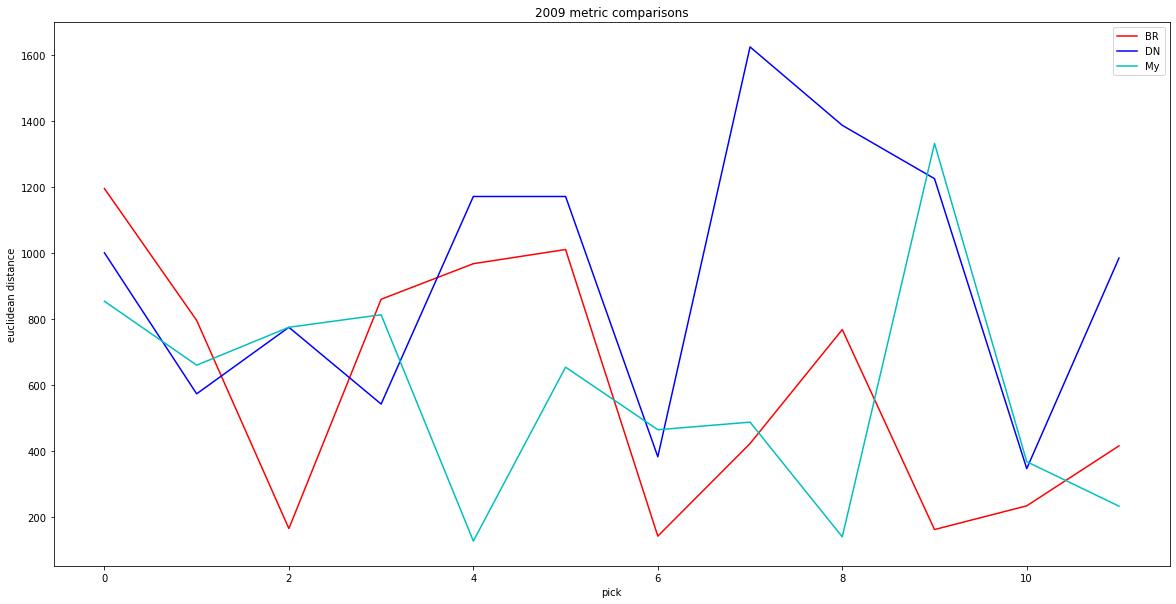

In [1169]:
plt.figure(figsize=(20,10))
plt.title('2009 metric comparisons')
plt.plot(np.arange(0,len(BRr[:12])),BRr[:12],'r',label='BR')
plt.plot(np.arange(0,len(DNn[:12])),DNn[:12],'b',label='DN')
plt.plot(np.arange(0,len(Myy[:12])),Myy[:12],'c',label='My')
plt.legend()
plt.xlabel('pick')
plt.ylabel('euclidean distance')
plt.show()

So the most accurate of years, 2009 we can see for almost the whole class, I am outperforming the other two sources for the majoroity of the picks

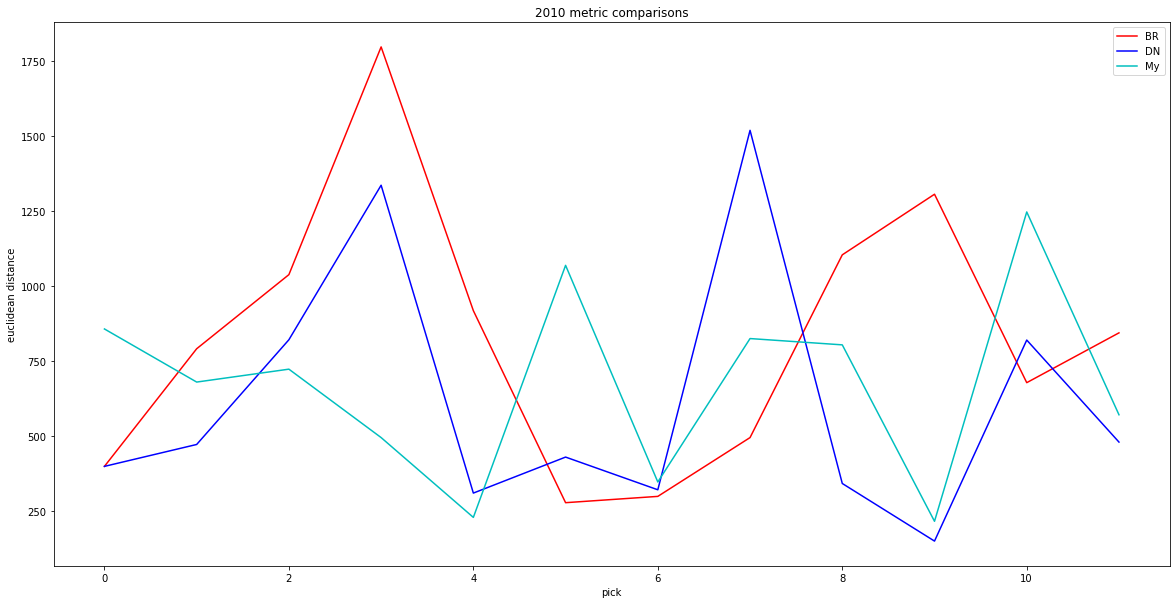

In [1170]:
plt.figure(figsize=(20,10))
plt.title('2010 metric comparisons')
plt.plot(np.arange(0,len(BRr[13:25])),BRr[13:25],'r',label='BR')
plt.plot(np.arange(0,len(DNn[13:25])),DNn[13:25],'b',label='DN')
plt.plot(np.arange(0,len(Myy[13:25])),Myy[13:25],'c',label='My')
plt.legend()
plt.xlabel('pick')
plt.ylabel('euclidean distance')
plt.show()

starts of poorly for the first 3 picks, but picks itself up for the picks after by doing well against the other two sources

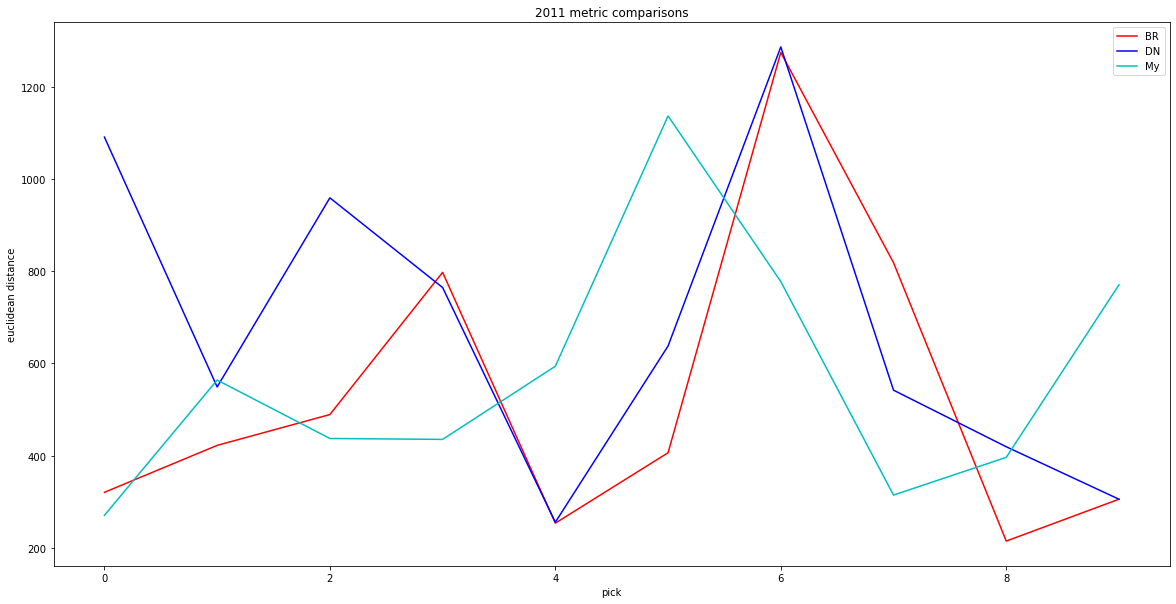

In [1171]:
plt.figure(figsize=(20,10))
plt.title('2011 metric comparisons')
plt.plot(np.arange(0,len(BRr[25:])),BRr[25:],'r',label='BR')
plt.plot(np.arange(0,len(DNn[25:])),DNn[25:],'b',label='DN')
plt.plot(np.arange(0,len(Myy[25:])),Myy[25:],'c',label='My')
plt.legend()
plt.xlabel('pick')
plt.ylabel('euclidean distance')
plt.show()

first few picks, we do ok, then we have a really bad comparison where we over valued the playerand then for the last three picks we do well.

---

# 2020-2021 Draft class predictions

Now that my model has been shown to provide good results by comparison (see what I did there ;P), I can now project comparisons for the new set of players as well as provide insight into their rookie numbers

In [1172]:
ncaa.loc[4241:]

,Unnamed: 0,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
4241,4241,Oklahoma State,6-8,Cade Cunningham,PG/SG,NaN,220.0,5.7,0.400,2.3,14.8,0.438,6.5,0.846,5.8,4.9,27.0,20.1,0
4242,4242,USC,7-0,Evan Mobley,PF/C,NaN,215.0,1.2,0.300,0.4,10.3,0.578,6.0,0.694,5.8,4.1,33.0,16.4,3
4243,4243,Gonzaga,6-4,Jalen Suggs,PG,NaN,205.0,3.4,0.330,1.1,10.0,0.502,5.0,0.762,3.8,2.9,28.0,14.0,1
4244,4244,Florida St.,6-9,Scottie Barnes,SF/PF,NaN,225.0,1.7,0.275,0.5,8.1,0.503,4.1,0.621,2.8,1.7,24.0,10.3,2
4245,4245,Arkansas,6-6,Moses Moody,SG,NaN,205.0,5.1,0.358,1.8,12.1,0.427,5.2,0.812,5.8,4.7,32.0,16.8,0
4246,4246,Tennessee,6-5,Keon Johnson,SG/SF,NaN,185.0,1.8,0.271,0.5,9.1,0.449,4.1,0.703,3.7,2.6,27.0,11.3,3
4247,4247,Gonzaga,6-7,Corey Kispert,SG/SF,NaN,220.0,4.8,0.411,2.0,8.3,0.484,4.0,0.827,1.8,1.5,135.0,11.5,1
4248,4248,Texas,6-11,Kai Jones,C,NaN,220.0,1.1,0.345,0.4,4.1,0.553,2.3,0.677,1.8,1.2,53.0,6.2,2
4249,4249,Michigan,6-9,Franz Wagner,SF/PF,NaN,220.0,4.3,0.325,1.4,9.3,0.465,4.3,0.835,2.4,2.0,55.0,12.0,1
4250,4250,Stanford,6-8,Ziaire Williams,SG/SF,NaN,185.0,4.0,0.291,1.2,10.2,0.374,3.8,0.796,2.5,2.0,20.0,10.7,1


drop the useless column

In [1174]:
ncaa.drop(columns='Unnamed: 0',inplace=True)

ncaa data without the new picks

In [1198]:
pred = ncaa.loc[:4240,'weight':]
pred

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
0,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.7280,2.50,1.80,134.0,8.5,2
1,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.6620,4.05,2.75,93.5,13.4,3
2,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.6280,7.90,5.00,88.0,26.4,0
3,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.8630,6.40,5.50,64.0,29.0,0
4,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.7000,3.90,2.70,107.0,13.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,195.0,1.1,0.268,0.3,5.2,0.4770,2.50,0.6000,2.60,1.60,127.0,6.9,2
4237,240.0,0.7,0.294,0.2,8.2,0.4770,3.90,0.6240,3.90,2.40,26.0,10.5,2
4238,240.0,0.0,0.250,0.0,2.9,0.4760,1.40,0.4290,1.00,0.40,63.0,3.2,2
4239,170.0,3.8,0.366,1.4,10.7,0.4550,4.90,0.7560,3.80,2.80,109.0,14.0,1


data with just the picks

In [1199]:
pred2 = ncaa.loc[4241:,'weight':]
pred2

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
4241,220.0,5.7,0.400,2.3,14.8,0.438,6.5,0.846,5.8,4.9,27.0,20.1,0
4242,215.0,1.2,0.300,0.4,10.3,0.578,6.0,0.694,5.8,4.1,33.0,16.4,3
4243,205.0,3.4,0.330,1.1,10.0,0.502,5.0,0.762,3.8,2.9,28.0,14.0,1
4244,225.0,1.7,0.275,0.5,8.1,0.503,4.1,0.621,2.8,1.7,24.0,10.3,2
4245,205.0,5.1,0.358,1.8,12.1,0.427,5.2,0.812,5.8,4.7,32.0,16.8,0
4246,185.0,1.8,0.271,0.5,9.1,0.449,4.1,0.703,3.7,2.6,27.0,11.3,3
4247,220.0,4.8,0.411,2.0,8.3,0.484,4.0,0.827,1.8,1.5,135.0,11.5,1
4248,220.0,1.1,0.345,0.4,4.1,0.553,2.3,0.677,1.8,1.2,53.0,6.2,2
4249,220.0,4.3,0.325,1.4,9.3,0.465,4.3,0.835,2.4,2.0,55.0,12.0,1
4250,185.0,4.0,0.291,1.2,10.2,0.374,3.8,0.796,2.5,2.0,20.0,10.7,1


## Cade Cunningham

In [1212]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[0:1],metric='euclidean')
pred[similar1 == similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1435,220.0,4.3,0.32,1.4,16.0,0.429,6.9,0.734,3.6,2.7,30.0,17.8,0


In [1217]:
ncaa.loc[1435]

college         Seton Hall University
height                           6-10
name                    Eddie Griffin
position                          F-C
url         /players/g/griffed01.html
weight                            220
3PA                               4.3
3P%                              0.32
3P                                1.4
FGA                                16
FG%                             0.429
FG                                6.9
FT%                             0.734
FTA                               3.6
FT                                2.7
G                                  30
PTS                              17.8
labels                              0
Name: 1435, dtype: object

In [1218]:
ncaa.loc[1434]

college        University of Oklahoma
height                           6-10
name                    Blake Griffin
position                            F
url         /players/g/griffbl01.html
weight                            251
3PA                               0.1
3P%                               0.3
3P                                  0
FGA                              11.5
FG%                             0.618
FG                                7.1
FT%                             0.589
FTA                               7.7
FT                                4.5
G                                  68
PTS                              18.8
labels                              0
Name: 1434, dtype: object

Cade Cunningham's comparison is Eddie/Blake Griffin

## Evan Mobley

In [1219]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[1:2],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1529,215.0,2.5,0.215,0.5,13.3,0.452,6.0,0.676,4.3,2.9,32.0,15.5,3


In [1220]:
ncaa.loc[1529]

college         St. John's University
height                            6-9
name                 Maurice Harkless
position                          F-G
url         /players/h/harklma01.html
weight                            215
3PA                               2.5
3P%                             0.215
3P                                0.5
FGA                              13.3
FG%                             0.452
FG                                  6
FT%                             0.676
FTA                               4.3
FT                                2.9
G                                  32
PTS                              15.5
labels                              3
Name: 1529, dtype: object

Evan Mobley's comparison is Maurice Harkless

## Jalen Suggs

In [1222]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[2:3],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3664,205.0,4.0,0.342,1.4,12.6,0.452,5.7,0.849,4.8,4.1,29.0,16.8,0


In [1223]:
ncaa.loc[3664]

college               Duke University
height                            6-8
name                     Jayson Tatum
position                            F
url         /players/t/tatumja01.html
weight                            205
3PA                                 4
3P%                             0.342
3P                                1.4
FGA                              12.6
FG%                             0.452
FG                                5.7
FT%                             0.849
FTA                               4.8
FT                                4.1
G                                  29
PTS                              16.8
labels                              0
Name: 3664, dtype: object

Jalen Suggs comparison is Jayson Tatum

## Scottie Barnes

In [1224]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[3:4],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2783,228.0,0.0,0.222,0.0,6.9,0.59,4.1,0.529,4.3,2.3,24.0,10.5,2


In [1225]:
ncaa.loc[2783]

college       University of Kentucky
height                          6-11
name                    Nerlens Noel
position                         C-F
url         /players/n/noelne01.html
weight                           228
3PA                                0
3P%                            0.222
3P                                 0
FGA                              6.9
FG%                             0.59
FG                               4.1
FT%                            0.529
FTA                              4.3
FT                               2.3
G                                 24
PTS                             10.5
labels                             2
Name: 2783, dtype: object

Scottie Barnes' comparison is Nerlens Noel

## Moses Moody

In [1226]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[4:5],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3664,205.0,4.0,0.342,1.4,12.6,0.452,5.7,0.849,4.8,4.1,29.0,16.8,0


In [1228]:
ncaa.loc[3664]

college               Duke University
height                            6-8
name                     Jayson Tatum
position                            F
url         /players/t/tatumja01.html
weight                            205
3PA                                 4
3P%                             0.342
3P                                1.4
FGA                              12.6
FG%                             0.452
FG                                5.7
FT%                             0.849
FTA                               4.8
FT                                4.1
G                                  29
PTS                              16.8
labels                              0
Name: 3664, dtype: object

Moses Moody's comparison is Jayson Tatum

## Keon Johnson

In [1229]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[5:6],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2682,185.0,0.9,0.333,0.3,9.6,0.511,4.0,0.7,3.9,2.1,25.0,10.1,3


In [1230]:
ncaa.loc[2682]

college     Eastern Kentucky University
height                              6-5
name                    Chuck Mrazovich
position                              F
url           /players/m/mrazoch01.html
weight                              185
3PA                                 0.9
3P%                               0.333
3P                                  0.3
FGA                                 9.6
FG%                               0.511
FG                                    4
FT%                                 0.7
FTA                                 3.9
FT                                  2.1
G                                    25
PTS                                10.1
labels                                3
Name: 2682, dtype: object

Keon Johnson's comparison is Chuck Mrazovich

## Corey Kispert

In [1231]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[6:7],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
1165,220.0,3.8,0.362,1.4,8.7,0.411,3.6,0.657,3.2,2.1,134.0,10.7,1


In [1232]:
ncaa.loc[1165]

college         University of Florida
height                            6-8
name              Dorian Finney-Smith
position                            F
url         /players/f/finnedo01.html
weight                            220
3PA                               3.8
3P%                             0.362
3P                                1.4
FGA                               8.7
FG%                             0.411
FG                                3.6
FT%                             0.657
FTA                               3.2
FT                                2.1
G                                 134
PTS                              10.7
labels                              1
Name: 1165, dtype: object

Corey Kispter's comparison is Dorian Finney-Smith

## Kai Jones

In [1233]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[7:8],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2999,220.0,0.9,0.333,0.3,4.7,0.632,3.0,0.689,3.0,2.1,55.0,8.1,2


In [1234]:
ncaa.loc[2999]

college        University of Maryland
height                            6-8
name                  Charles Pittman
position                            F
url         /players/p/pittmch01.html
weight                            220
3PA                               0.9
3P%                             0.333
3P                                0.3
FGA                               4.7
FG%                             0.632
FG                                  3
FT%                             0.689
FTA                                 3
FT                                2.1
G                                  55
PTS                               8.1
labels                              2
Name: 2999, dtype: object

Kai Jones' comparison is Charles Pittman

## Franz Wagner

In [1235]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[8:9],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
2763,220.0,0.3,0.235,0.1,7.1,0.548,3.9,0.643,1.7,1.1,58.0,8.9,2


In [1236]:
ncaa.loc[2763]

college              Miami University
height                            6-7
name                       Ira Newble
position                            F
url         /players/n/newblir01.html
weight                            220
3PA                               0.3
3P%                             0.235
3P                                0.1
FGA                               7.1
FG%                             0.548
FG                                3.9
FT%                             0.643
FTA                               1.7
FT                                1.1
G                                  58
PTS                               8.9
labels                              2
Name: 2763, dtype: object

Franz Wagner's comparison is Ira Newble

## Ziaire Williams

In [1237]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[9:10],metric='euclidean')
pred[similar1==similar1.min()]

C:\Users\aydin\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3007,185.0,0.1,0.288,0.0,9.6,0.535,4.5,0.729,2.1,1.5,23.0,10.5,2


In [1238]:
ncaa.loc[3007]

college           Stanford University
height                            6-4
name                      Jim Pollard
position                          F-C
url         /players/p/pollaji01.html
weight                            185
3PA                               0.1
3P%                             0.288
3P                                  0
FGA                               9.6
FG%                             0.535
FG                                4.5
FT%                             0.729
FTA                               2.1
FT                                1.5
G                                  23
PTS                              10.5
labels                              2
Name: 3007, dtype: object

Ziaire Williams comparison is Jim Pollard

## James Bouknight 

In [1240]:
similar1 = scipy.spatial.distance.cdist(pred,pred2[10:11],metric='euclidean')
pred[similar1==similar1.min()]

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS,labels
3243,190.0,2.6,0.337,0.9,10.9,0.477,5.2,0.712,5.1,3.7,40.0,14.9,1


In [1241]:
ncaa.loc[3243]

college        University of Memphis
height                           6-3
name                    Derrick Rose
position                           G
url         /players/r/rosede01.html
weight                           190
3PA                              2.6
3P%                            0.337
3P                               0.9
FGA                             10.9
FG%                            0.477
FG                               5.2
FT%                            0.712
FTA                              5.1
FT                               3.7
G                                 40
PTS                             14.9
labels                             1
Name: 3243, dtype: object

James Bouknight's prediction is Derrick Rose

DISCLAIMER**** If you decide to invest in NBA Top Shots or any licensed rookie cards that hold monetary value, based on these reports, I take no responsibility for gained or lost money in the process, this report stands as a way to inform people how players may play in the NBA

My top prospects to draft from this would be Cade Cunningham, Jalen Suggs, Moses Moody, Keon Johnson, and James Bouknight for any GM who has any of these players on their draft board during their selection

---